## Exploratory Data Analysis

###  1) What movie genre has mostly been produced?

> Some movies have alot of genres, example the Jurassic World which is acombination of Action, Adventure, Science Fiction and Thriller. To get each individual genres we will be using the str.split and the value_count to know the number of occurrence.

In [1]:
#Recalling steps taken in data cleaning stage

#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Load dataset using pandas
movies_df=pd.read_csv('tmdb-movies.csv')
movies_df.head(5)

# Splitting the genres column into multiple rows
movies_df=movies_df.drop('genres', axis=1).join(movies_df['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('genres'))
movies_df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00,Mystery
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00,Comedy
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00,Action
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00,Comedy


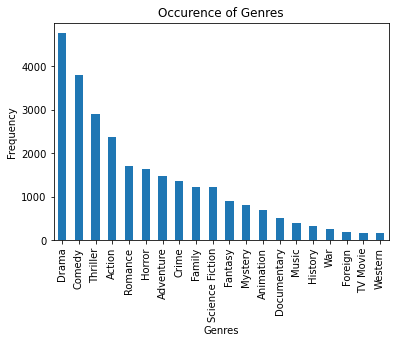

In [2]:
# Count for the various genres
genre_count= movies_df['genres'].value_counts()
genre_count.plot(kind='bar', title='Occurence of Genres', ylabel='Frequency', xlabel='Genres');

> Using the value_counts function to check the number of times a particular genre of movie apppears in the dataframe. From the plot above it shows that a lot of movies in the drama genre has been produced over the years followed by Thriller, Comedy and Action. The least produced are Western, Documentary, TV movie and Foreign.

### 2) Are movies with shorter runtime more popular than movies with a longer runtime?

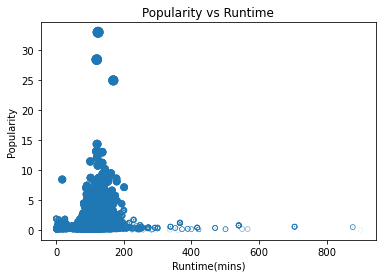

In [3]:
# Using the scatter plot
x_axis= movies_df['runtime']
y_axis= movies_df['popularity']
plt.scatter(x_axis, y_axis, linewidths= 5, s=y_axis)
plt.xlabel('Runtime(mins)')
plt.ylabel('Popularity')
plt.title('Popularity vs Runtime')
plt.show()

> It sure does look like movies not greater than 200 mins runtime have more popularity as compared to movies that have runtime greater than 200 mins. 

### 3) What genre of movie have longer runtime?

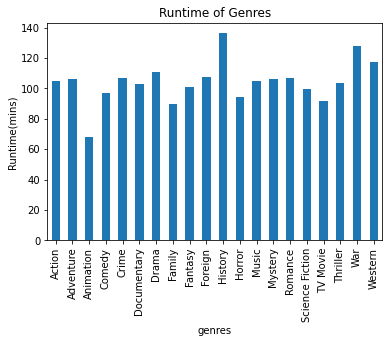

In [4]:
# Grouping dataframe by genres and getting the mean of runtime
gen_runtime=movies_df.groupby('genres').runtime.mean()
gen_runtime.plot(kind='bar', title="Runtime of Genres", ylabel="Runtime(mins)");

> History sure does take alot of time since it is showing "history".  From the plot above the History has a high runtime followed by war while animation has the shortest. 

### 4) Which year did Historic movie come more in production

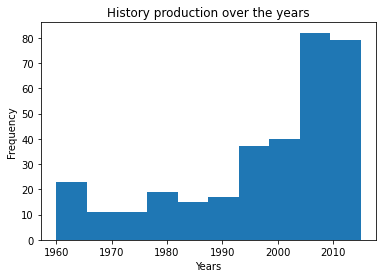

In [5]:
# Selecting the History genre only from the data
h_gen=movies_df.query('genres == "History"')
h_year=h_gen['release_year']

plt.hist(h_year, bins= 10)
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.title('History production over the years')
plt.show()

> The histogram above shows Historic movie came more into production around the year 2000. I could imagine one reason might be because people were beginning to "loose sight" of where they came from or how some things came into being. 

### 5) What genre gets the highest rating?

In [6]:
# Grouping dataframe by genres
gen=movies_df.groupby('genres')
gen.first(1)

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
genres,,,,,,,,,,
Action,135397,32.985763,150000000,1513528810,124,5562,6.5,2015,1.379999e+08,1.392446e+09
Adventure,135397,32.985763,150000000,1513528810,124,5562,6.5,2015,1.379999e+08,1.392446e+09
Animation,211672,7.404165,74000000,1156730962,91,2893,6.5,2015,6.807997e+07,1.064192e+09
Comedy,211672,7.404165,74000000,1156730962,91,2893,6.5,2015,6.807997e+07,1.064192e+09
Crime,168259,9.335014,190000000,1506249360,137,2947,7.3,2015,1.747999e+08,1.385749e+09
Documentary,331781,0.738404,0,8413144,128,345,7.5,2015,0.000000e+00,7.740089e+06
Drama,281957,9.110700,135000000,532950503,156,3929,7.2,2015,1.241999e+08,4.903142e+08
Family,211672,7.404165,74000000,1156730962,91,2893,6.5,2015,6.807997e+07,1.064192e+09
Fantasy,140607,11.173104,200000000,2068178225,136,5292,7.5,2015,1.839999e+08,1.902723e+09


In [7]:
# Creating function that gets the mean vote_count(rating) for each genre
def get_group(genre):
    for g in gen:
        result = gen.get_group(genre).vote_count.mean()
    return result

In [8]:
# Getting the mean of vote count for each genre
d = get_group('Drama')
c = get_group('Comedy')
t = get_group('Thriller')
a = get_group('Action')
r = get_group('Romance')
h = get_group('Horror')
ad = get_group('Adventure')
cr = get_group('Crime')
sf = get_group('Science Fiction')
f = get_group('Family')
fa = get_group('Fantasy')
fo = get_group('Foreign')
m = get_group('Mystery')
an = get_group('Animation')
mu = get_group('Music')
do = get_group('Documentary')
hi = get_group('History')
w = get_group('War')
we = get_group('Western')
tm = get_group('TV Movie')

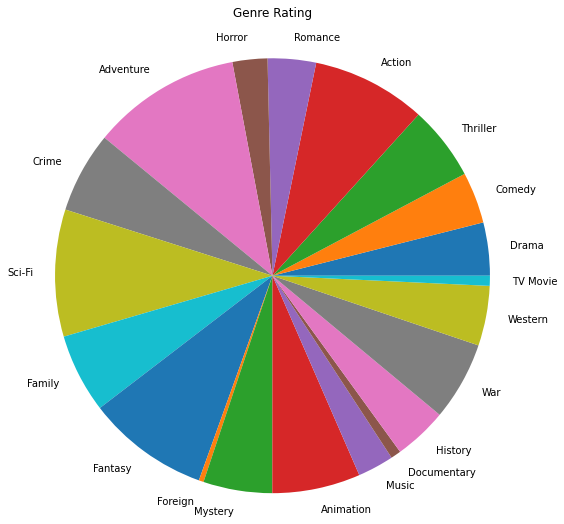

In [9]:
# Plotting pie chart
x= np.array([d,c,t,a,r,h,ad,cr,sf,f,fa,fo,m,an,mu,do,hi,w,we,tm])
label = ["Drama", "Comedy", "Thriller", "Action", "Romance", "Horror", "Adventure", "Crime","Sci-Fi","Family", "Fantasy","Foreign", "Mystery","Animation", "Music", "Documentary", "History", "War", "Western",
       "TV Movie"]
plt.pie(x, radius=2.5, labels=label)
plt.title('Genre Rating', loc='center', pad=150)
plt.show()

> From the pie chart above Science fiction (Sci-Fi), Adventure, Action and Comedy have high rating but the Foreign, TVmovie, Documentary have really low ratings

### 6) How has cost of movie production (budget) increased over the years?

In [10]:
# Checking for the years present in the dataframe using unique
movies_df['release_year'].unique()

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1968, 1974, 1975, 1962, 1964, 1971, 1990, 1961,
       1960, 1976, 1993, 1967, 1963, 1986, 1973, 1970, 1965, 1969, 1978,
       1966], dtype=int64)

In [11]:
# Using groupby to group dataframe based on the release year and using the mean value of the budget for the various unique years
prod_inc= movies_df.groupby('release_year').budget.mean()
prod_inc

release_year
1960    8.223185e+05
1961    1.567160e+06
1962    2.246276e+06
1963    2.608000e+06
1964    1.211456e+06
1965    2.261599e+06
1966    1.144235e+06
1967    3.309002e+06
1968    2.591728e+06
1969    1.652540e+06
1970    4.449452e+06
1971    1.963938e+06
1972    1.043072e+06
1973    1.108520e+06
1974    1.532868e+06
1975    1.239105e+06
1976    2.925410e+06
1977    3.309932e+06
1978    3.684506e+06
1979    5.120028e+06
1980    5.312077e+06
1981    4.375684e+06
1982    5.804009e+06
1983    7.665251e+06
1984    7.501313e+06
1985    8.564467e+06
1986    5.812870e+06
1987    6.401395e+06
1988    7.482718e+06
1989    8.944046e+06
1990    1.105192e+07
1991    1.299576e+07
1992    1.223259e+07
1993    1.117595e+07
1994    1.324761e+07
1995    1.704329e+07
1996    2.066879e+07
1997    2.792262e+07
1998    2.402667e+07
1999    2.823636e+07
2000    2.814171e+07
2001    2.641799e+07
2002    2.452649e+07
2003    2.481257e+07
2004    2.692528e+07
2005    2.318484e+07
2006    2.083820e+07


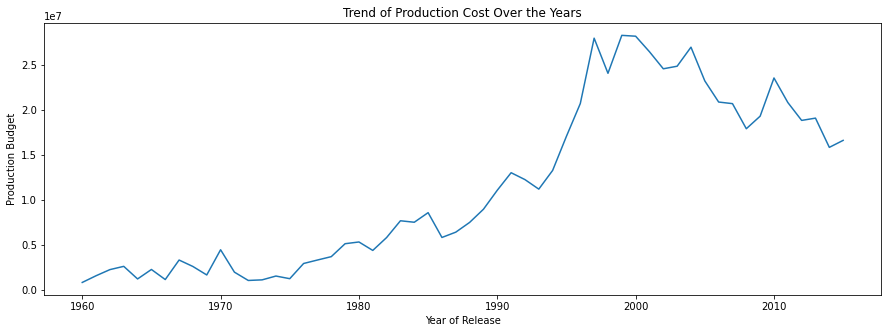

In [12]:
# Plotting the line graph
prod_inc.plot(kind='line', figsize=(15,5), use_index= True, title= 'Trend of Production Cost Over the Years', xlabel= 'Year of Release', ylabel= 'Production Budget');

> Plotting all the data in the same line graph does not show the full trend of the increase or decrease till the last year which is 2015, for better analysis we will be grouping the years from 1960-1999 and 2000-2015.

In [13]:
# Selecting the release year at specific integer positions using iloc
# This is to split the release year into the first half (1960-1999)
first_half=prod_inc.iloc[:40]
first_half

release_year
1960    8.223185e+05
1961    1.567160e+06
1962    2.246276e+06
1963    2.608000e+06
1964    1.211456e+06
1965    2.261599e+06
1966    1.144235e+06
1967    3.309002e+06
1968    2.591728e+06
1969    1.652540e+06
1970    4.449452e+06
1971    1.963938e+06
1972    1.043072e+06
1973    1.108520e+06
1974    1.532868e+06
1975    1.239105e+06
1976    2.925410e+06
1977    3.309932e+06
1978    3.684506e+06
1979    5.120028e+06
1980    5.312077e+06
1981    4.375684e+06
1982    5.804009e+06
1983    7.665251e+06
1984    7.501313e+06
1985    8.564467e+06
1986    5.812870e+06
1987    6.401395e+06
1988    7.482718e+06
1989    8.944046e+06
1990    1.105192e+07
1991    1.299576e+07
1992    1.223259e+07
1993    1.117595e+07
1994    1.324761e+07
1995    1.704329e+07
1996    2.066879e+07
1997    2.792262e+07
1998    2.402667e+07
1999    2.823636e+07
Name: budget, dtype: float64

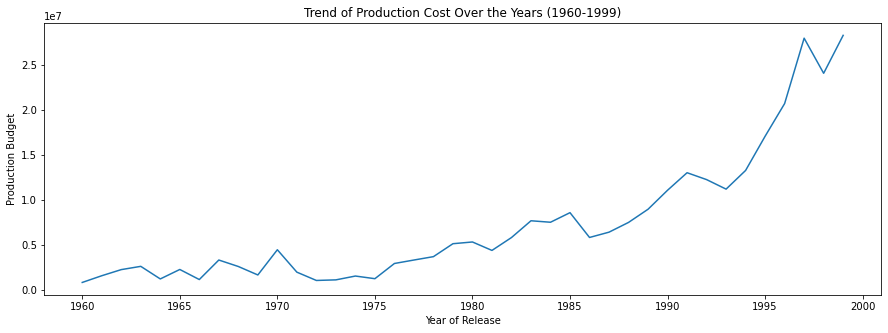

In [14]:
# Plotting line graph for first half
first_half.plot(kind='line', figsize=(15,5), use_index= True, title= 'Trend of Production Cost Over the Years (1960-1999)', xlabel= 'Year of Release', ylabel= 'Production Budget');

In [15]:
# Second half
second_half=prod_inc.iloc[40:]
second_half

release_year
2000    2.814171e+07
2001    2.641799e+07
2002    2.452649e+07
2003    2.481257e+07
2004    2.692528e+07
2005    2.318484e+07
2006    2.083820e+07
2007    2.066030e+07
2008    1.787724e+07
2009    1.927016e+07
2010    2.350770e+07
2011    2.078781e+07
2012    1.879969e+07
2013    1.905245e+07
2014    1.580962e+07
2015    1.658562e+07
Name: budget, dtype: float64

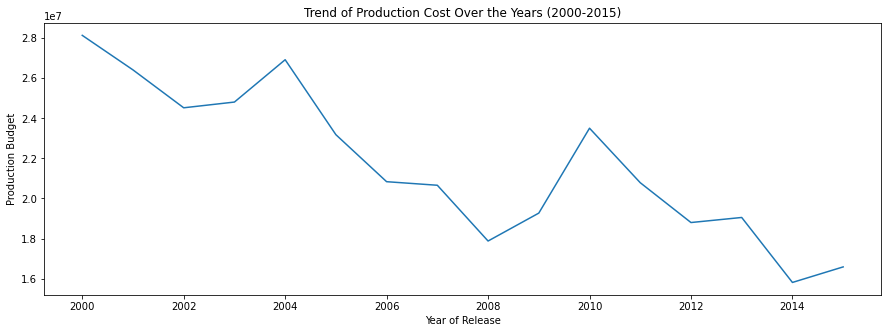

In [16]:
# Plotting the line graph of second half 
second_half.plot(kind='line', figsize=(15,5), use_index= True, title= 'Trend of Production Cost Over the Years (2000-2015)', xlabel= 'Year of Release', ylabel= 'Production Budget');

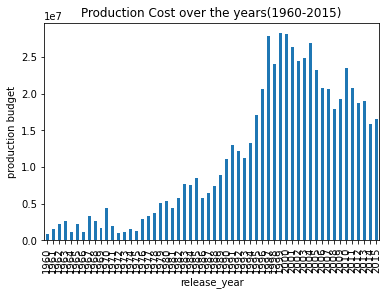

In [17]:
# Showing trend in a bar graph for 1960-2015
prod_inc.plot(kind='bar', ylabel='production budget', title='Production Cost over the years(1960-2015)');

From the line graph production cost gradually increased from 1960 to about 1995 but had a very sharp increase around 1996-2000 then with a fluctuating increase and decrease through 2000-2015. If the two graphs were to be merged we would see that production cost has not returned to what it used to be in the 90's but this can be seen in the bar graph. 2004 has the highest value of production cost

### 7) Do longer(higher runtime) movies automatically mean more cost?

In [18]:
# Group data by runtime
y=movies_df.groupby('runtime').budget
y.first()

runtime
0      0
2      0
3      0
4      0
5      0
      ..
561    0
566    0
705    0
877    0
900    0
Name: budget, Length: 247, dtype: int64

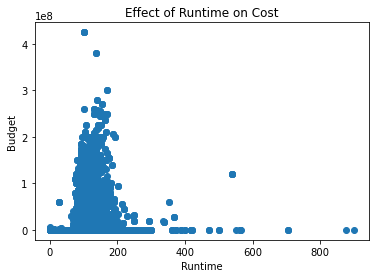

In [19]:
# Plotting a scatterplot
x = movies_df['runtime']
y = movies_df['budget']
plt.scatter(x,y)
plt.xlabel('Runtime')
plt.ylabel('Budget')
plt.title('Effect of Runtime on Cost')
plt.show()

> Though it felt like the longer the movie the more the cost, it is not actually the case. Though this data has a lot of zero values for both the budget and the runtime. Therefore, we cannot make a final decision.

### 8) What characteristics do movies with high profit and low profit have
>
> We will be calculating the profit by subtracting budget from revenue.

In [20]:
# Revenue - Budget
comp_prof=movies_df['revenue']- movies_df['budget']
comp_prof

0        1363528810
0        1363528810
0        1363528810
0        1363528810
1         228436354
            ...    
10863             0
10863             0
10864             0
10864             0
10865        -19000
Length: 26983, dtype: int64

In [21]:
# Creating another column in the existing dataframe to show the profit
movies_df['profit']=comp_prof
movies_df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,1363528810
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure,1363528810


In [22]:
movies_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,26983.000000,26983.000000,2.698300e+04,2.698300e+04,26983.000000,26983.000000,26983.000000,26983.000000,2.698300e+04,2.698300e+04,2.698300e+04
mean,58762.768632,0.705633,1.749520e+07,4.739459e+07,102.771004,249.775674,5.956754,2000.703517,2.102318e+07,6.082685e+07,2.989939e+07
std,86790.083975,1.114518,3.459516e+07,1.321502e+08,30.408833,637.728286,0.912326,12.763871,3.818562e+07,1.614585e+08,1.095034e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08
25%,10202.000000,0.224450,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,18221.000000,0.411236,9.500000e+01,0.000000e+00,99.000000,44.000000,6.000000,2005.000000,1.044719e+02,0.000000e+00,0.000000e+00
75%,58432.000000,0.774042,2.000000e+07,3.052476e+07,112.000000,173.000000,6.600000,2011.000000,2.704173e+07,4.359754e+07,1.331940e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,2.544506e+09


In [23]:
# Only data with profit greater than the profit mean
high_profit=movies_df.query('profit>profit.mean()')

In [24]:
high_profit.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,5096.000000,5096.000000,5.096000e+03,5.096000e+03,5096.000000,5096.000000,5096.000000,5096.000000,5.096000e+03,5.096000e+03,5.096000e+03
mean,35105.680926,1.807362,5.405901e+07,2.200993e+08,112.892857,946.098509,6.344388,2000.968799,6.229133e+07,2.785268e+08,1.660403e+08
std,63889.718930,2.058765,5.262261e+07,2.329127e+08,25.038347,1183.244476,0.716030,11.307497,5.410231e+07,2.772849e+08,1.993651e+08
min,11.000000,0.010335,0.000000e+00,3.000000e+07,44.000000,10.000000,3.400000,1960.000000,0.000000e+00,2.781157e+07,2.995860e+07
25%,1996.000000,0.773231,1.500000e+07,8.160000e+07,98.000000,218.000000,5.900000,1995.000000,2.193446e+07,1.070319e+08,5.363887e+07
50%,9872.000000,1.270881,4.000000e+07,1.409038e+08,109.000000,520.000000,6.300000,2004.000000,4.741411e+07,1.862992e+08,9.717754e+07
75%,32698.500000,2.117029,7.800000e+07,2.670458e+08,124.000000,1152.000000,6.900000,2010.000000,9.120892e+07,3.438571e+08,1.911318e+08
max,417859.000000,32.985763,3.800000e+08,2.781506e+09,705.000000,9767.000000,8.300000,2015.000000,3.683713e+08,2.827124e+09,2.544506e+09


In [25]:
# Only data with profit less than the profit mean
low_profit=movies_df.query('profit<profit.mean()')

In [26]:
low_profit.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,21887.000000,21887.000000,2.188700e+04,2.188700e+04,21887.000000,21887.000000,21887.000000,21887.000000,2.188700e+04,2.188700e+04,2.188700e+04
mean,64270.902179,0.449115,8.981971e+06,7.183356e+06,100.414310,87.649244,5.866501,2000.641751,1.141463e+07,1.013929e+07,-1.798615e+06
std,90418.498680,0.442980,2.114428e+07,1.841476e+07,31.058845,190.469082,0.929331,13.079174,2.504743e+07,2.520294e+07,1.448303e+07
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08
25%,11377.000000,0.196668,0.000000e+00,0.000000e+00,90.000000,16.000000,5.300000,1994.000000,0.000000e+00,0.000000e+00,-9.982595e+05
50%,21489.000000,0.338357,0.000000e+00,0.000000e+00,97.000000,30.000000,5.900000,2005.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,66125.000000,0.559817,8.510000e+06,4.027187e+06,109.000000,78.000000,6.500000,2011.000000,1.148332e+07,5.298017e+06,0.000000e+00
max,414419.000000,8.411577,4.250000e+08,2.841391e+08,900.000000,5754.000000,9.200000,2015.000000,4.250000e+08,4.111904e+08,2.988824e+07


> Awesome! We can clearly see the difference between companies that have made high profit and those that have not in terms of their budget, revenue and vote_count as movies with high profit have more than movies with low profit

### 9) What genre of movie has the highest profit?

> We have seen that movies with high profit have high vote_count, to confirm this we would be using a bar graph plotting profit against genres.

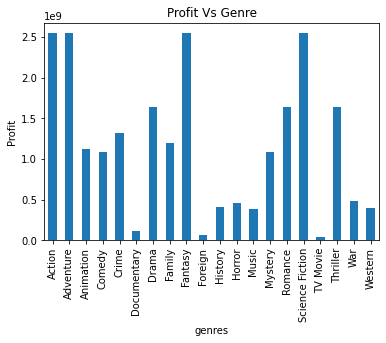

In [27]:
gen_prof = movies_df.groupby('genres').profit.max()
gen_prof.plot(kind='bar', ylabel='Profit', title='Profit Vs Genre');

From the plot above, Action, Adventure, Fantasy and Science Fiction are the movies which have made the highes profit so far and this goes with the analysis which shows that movies with high profit have high vote_count as was seen in the pie chart above, same with Foreign, Tv Movie and Documentary which have low rating resulting to very low profit.